<a href="https://colab.research.google.com/github/iwatobipen/playground/blob/master/plot_chemicalspace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2018-12-09 06:11:47--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.16.18.10, 104.16.19.10, 2606:4700::6810:130a, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.16.18.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62574861 (60M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  59.68M  69.4MB/s    in 0.9s    

2018-12-09 06:11:48 (69.4 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [62574861/62574861]

PREFIX=/usr/local
reinstalling: python-3.7.0-hc3d631a_0 ...
Python 3.7.0
reinstalling: ca-certificates-2018.03.07-0 ...
reinstalling: conda-env-2.6.0-1 ...
reinstalling: libgcc-ng-8.2.0-hdf63c60_1 ...
reinstalling: libstdcxx-ng-8.2.0-hdf63c60_1 ...
reinstalling: libffi-3.2.1-hd88cf55_4 ...
reinstalling: ncurses-6.1-hf484d3e_0 ...
reinstalling: openssl-1.0.2p-h14c3975_0 ...
reinstalling: xz-5.2.4-h1

In [0]:
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [0]:
import pandas as pd
import numpy as np
import altair as alt

from rdkit import Chem
from rdkit import rdBase
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from rdkit.Chem import PandasTools
from rdkit.Chem import RDConfig
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

from sklearn.decomposition import PCA


In [5]:
print(rdBase.rdkitVersion)

2018.09.1


In [0]:
moldf = PandasTools.LoadSDF(os.path.join(RDConfig.RDDocsDir, 'Book/data/cdk2.sdf'))
moldf['SMILES'] = moldf.ROMol.apply(Chem.MolToSmiles)

,Cluster,ID,MODEL.CCRATIO,MODEL.SOURCE,ROMol,b_mmffld_Minimization_Converged-OPLS_2005,id,r_mmffld_Potential_Energy-OPLS_2005,r_mmffld_RMS_Derivative-OPLS_2005,s_st_Chirality_1,s_st_Chirality_2,s_st_Chirality_3,SMILES
0,1,ZINC03814457,1,CORINA 3.44 0027 09.01.2008,,1,ZINC03814457,-78.6454,0.000213629,NaN,NaN,NaN,CC(C)C(=O)COc1nc(N)nc2[nH]cnc12
1,2,ZINC03814459,1,CORINA 3.44 0027 09.01.2008,,1,ZINC03814459,-67.4705,9.48919e-05,13_S_17_12_14_24,NaN,NaN,Nc1nc(OCC2CCCO2)c2nc[nH]c2n1

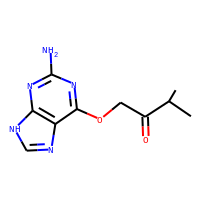
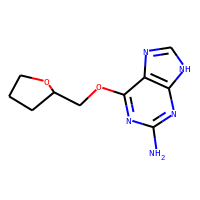

In [7]:
moldf.head(2)

In [0]:
def mol2fparr(mol):
    arr = np.zeros((0,))
    fp = AllChem.GetMorganFingerprintAsBitVect(mol,2)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

In [0]:
pca = PCA(n_components=2)

In [12]:
X = np.asarray([mol2fparr(mol) for mol in moldf.ROMol])
print(X.shape)
res = pca.fit_transform(X)
print(res.shape)
moldf['PCA1'] = res[:,0]
moldf['PCA2'] = res[:,1]
moldf2 = moldf[['ID', 'PCA1', 'PCA2', 'SMILES' ]]
moldf2['Cluster'] = ["{:0=2}".format(int(cls)) for cls in moldf.loc[:,'Cluster']]

(47, 2048)
(47, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
alt.Chart(moldf2).mark_point().encode(
           x = 'PCA1',
           y = 'PCA2',
           color = 'Cluster',
           tooltip = ['ID', 'SMILES']).interactive()

Chart({
  data:               ID      PCA1      PCA2                                                             SMILES Cluster
  0   ZINC03814457  2.179485 -1.307241                                    CC(C)C(=O)COc1nc(N)nc2[nH]cnc12      01
  1   ZINC03814459  2.850687 -2.795246                                       Nc1nc(OCC2CCCO2)c2nc[nH]c2n1      02
  2   ZINC03814460  2.438632 -2.717624                                   Nc1nc(OCC2CCC(=O)N2)c2nc[nH]c2n1      02
  3   ZINC00023543  3.241061 -3.078878                                      Nc1nc(OCC2CCCCC2)c2nc[nH]c2n1      03
  4   ZINC03814458  2.986385 -2.813751                                     Nc1nc(OCC2CC=CCC2)c2nc[nH]c2n1      03
  5   ZINC01641925  2.054942  2.794210                                   Cn1cnc2c(NCc3ccccc3)nc(NCCO)nc21      03
  6   ZINC01649340  2.385822  3.468222                           CCC(CO)Nc1nc(NCc2ccccc2)c2ncn(C(C)C)c2n1      03
  7   ZINC01487345  1.894359  3.035862                        COc1ccc(CNc2nc(N(CCO)CCO)nc3c2ncn3C(C)C)cc1      03
  8   ZINC03814479  2.336774 -2.298163                                      Nc1nc(N)c(N=O)c(OCC2CCCCC2)n1      04
  9   ZINC03814467 -2.317993 -0.892227                              COc1ccc2c(c1)/C(=C/c1cnc[nH]1)C(=O)N2      05
  10  ZINC03814470 -2.922876 -1.331278                    COc1cc[nH]c1/C=C1\C(=O)Nc2ccc([N+](=O)[O-])cc21      05
  11  ZINC03814455  0.621407  1.036557                                  CCc1cnc(CSc2cnc(NC(=O)C(C)C)s2)o1      06
  12  ZINC03814464  0.413050  0.171634                                CCCCOc1c(C(=O)c2nccs2)cnc2[nH]ncc12      07
  13  ZINC00003491 -2.184128 -0.529949                           COc1cc(-c2ccc[nH]2)c2c3c(ccc(F)c13)NC2=O      08
  14  ZINC03814473 -1.859332 -0.552844                    [NH3+]CCSc1cc(-c2ccc[nH]2)c2c3c(ccc(F)c13)NC2=O      08
  15  ZINC03814477 -1.359621  2.085940                          NC(=O)Nc1cccc2c1C(=O)c1c-2n[nH]c1-c1cccs1      09
  16  ZINC03814468 -2.668851 -1.042941                      COc1ccc2c(c1)/C(=C/c1[nH]cc3c1CCOC3=O)C(=O)N2      10
  17  ZINC03814469 -2.970742 -1.261339             CNS(=O)(=O)c1ccc2c(c1)/C(=C/c1[nH]cc3c1CCNC3=O)C(=O)N2      10
  18  ZINC03814476 -1.458022  2.329328                         CC(=O)Nc1cccc2c1C(=O)c1c-2n[nH]c1-c1ccncc1      11
  19  ZINC00023904 -1.541466  2.322956                   COc1ccc(-c2[nH]nc3c2C(=O)c2c(NC(N)=O)cccc2-3)cc1      11
  20  ZINC03814475 -1.587261  2.580549              COc1ccc(-c2[nH]nc3c2C(=O)c2c(NC(=O)NN(C)C)cccc2-3)cc1      11
  21  ZINC03814452  1.168203  1.058058                                 Cc1nc2ccccn2c1-c1ccnc(Nc2ccccc2)n1      12
  22  ZINC03814454  1.387065  1.249633               Cc1nc2ccccn2c1-c1ccnc(Nc2ccc(OCC(O)C[NH+](C)C)cc2)n1      12
  23  ZINC03814449  0.063261  1.024443                                O=C(Nc1ccccn1)Nc1cccc2c1C1CCCN1C2=O      13
  24  ZINC03814441 -2.089415 -1.178082                     NS(=O)(=O)c1ccc(N/N=C2\C(=O)Nc3ccc(Br)cc32)cc1      14
  25  ZINC03814443 -2.937267 -0.688712                        CNS(=O)(=O)c1ccc(N/C=C2\C(=O)Nc3ccccc32)cc1      14
  26  ZINC04617747 -2.803171 -0.684669                   N=C(N)NS(=O)(=O)c1ccc(N/C=C2\C(=O)Nc3ccccc32)cc1      14
  27  ZINC03814440 -2.367906 -0.187609                      O=C1Nc2ccc(S(=O)(=O)O)cc2/C1=C1/Nc2ccccc2C1=O      15
  28  ZINC03814462  3.156015 -2.231577                            c1ccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)cc1      16
  29  ZINC00603011  2.665343 -3.088788                  NS(=O)(=O)c1ccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)cc1      16
  30  ZINC00023841  0.565380  0.533676                            O=C(c1ccccc1)c1cnc2n[nH]cc2c1OCc1ccccc1      17
  31  ZINC03814450 -0.783763 -0.564469           NS(=O)(=O)c1ccc(Nc2cc(-c3ccc([N+](=O)[O-])cc3)[nH]n2)cc1      18
  32  ZINC03814465  0.287975  0.170387                       CCCCOc1c(C(=O)c2c(F)cc(Br)cc2F)cnc2[nH]ncc12      19
  33  ZINC03814453  0.156671 -0.161636                     Cc1ccc(F)c(Nc2ccnc(Nc3ccc(S(N)(=O)=O)cc3)n2)c1     